<a href="https://colab.research.google.com/github/eooloyede/Data-Analytics/blob/main/Analysis_of_Crime_Rate_in_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 To run spark, dependencies are installed: Java 8, Apache Spark with Hadoop and Findspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
#The enviroment variables are also set
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
#Other important spark libraries are also imported
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.appName("ReadExcel").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [ ]:
#Import other neccessary libraries
import pyspark.sql.functions as func
from pyspark.sql.functions import sum
import pandas as pd

In [ ]:
#Install the python library that can read and ods file
!pip install odfpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160673 sha256=54f7db712930a11aca087aadabe1fddda46a5fac8e8a0ba464bdc6754579baa1
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


In [ ]:
#Load the dataset into pandas
DF12_13 = pd.read_excel('/content/sample_data/prc-pfa-mar2013-onwards-tables-191023.ods', sheet_name='2012-13')
DF13_14 = pd.read_excel('/content/sample_data/prc-pfa-mar2013-onwards-tables-191023.ods', sheet_name='2013-14')
DF14_15 = pd.read_excel('/content/sample_data/prc-pfa-mar2013-onwards-tables-191023.ods', sheet_name='2014-15')
DF15_16 = pd.read_excel('/content/sample_data/prc-pfa-mar2013-onwards-tables-191023.ods', sheet_name='2015-16')
DF16_17 = pd.read_excel('/content/sample_data/prc-pfa-mar2013-onwards-tables-191023.ods', sheet_name='2016-17')
DF17_18 = pd.read_excel('/content/sample_data/prc-pfa-mar2013-onwards-tables-191023.ods', sheet_name='2017-18')
DF18_19 = pd.read_excel('/content/sample_data/prc-pfa-mar2013-onwards-tables-191023.ods', sheet_name='2018-19')
DF19_20 = pd.read_excel('/content/sample_data/prc-pfa-mar2013-onwards-tables-191023.ods', sheet_name='2019-20')
DF20_21 = pd.read_excel('/content/sample_data/prc-pfa-mar2013-onwards-tables-191023.ods', sheet_name='2020-21')
DF21_22 = pd.read_excel('/content/sample_data/prc-pfa-mar2013-onwards-tables-191023.ods', sheet_name='2021-22')
DF22_23 = pd.read_excel('/content/sample_data/prc-pfa-mar2013-onwards-tables-191023.ods', sheet_name='2022-23')

In [ ]:
DF12_13['Offence Code'] = DF12_13['Offence Code'].astype(str)
DF13_14['Offence Code'] = DF13_14['Offence Code'].astype(str)
DF14_15['Offence Code'] = DF14_15['Offence Code'].astype(str)
DF15_16['Offence Code'] = DF15_16['Offence Code'].astype(str)
DF16_17['Offence Code'] = DF16_17['Offence Code'].astype(str)
DF17_18['Offence Code'] = DF17_18['Offence Code'].astype(str)
DF18_19['Offence Code'] = DF18_19['Offence Code'].astype(str)
DF19_20['Offence Code'] = DF19_20['Offence Code'].astype(str)
DF20_21['Offence Code'] = DF20_21['Offence Code'].astype(str)
DF21_22['Offence Code'] = DF21_22['Offence Code'].astype(str)
DF22_23['Offence Code'] = DF22_23['Offence Code'].astype(str)

In [ ]:
spark_DF12_13 = spark.createDataFrame(DF12_13)
spark_DF13_14 = spark.createDataFrame(DF13_14)
spark_DF14_15 = spark.createDataFrame(DF14_15)
spark_DF15_16 = spark.createDataFrame(DF15_16)
spark_DF16_17 = spark.createDataFrame(DF16_17)
spark_DF17_18 = spark.createDataFrame(DF17_18)
spark_DF18_19 = spark.createDataFrame(DF18_19)
spark_DF19_20 = spark.createDataFrame(DF19_20)
spark_DF20_21 = spark.createDataFrame(DF20_21)
spark_DF21_22 = spark.createDataFrame(DF21_22)
spark_DF22_23 = spark.createDataFrame(DF22_23)

In [ ]:
spark_DF12_13.show()

+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|Financial Year|Financial Quarter|       Force Name| Offence Description|       Offence Group|    Offence Subgroup|Offence Code|Number of Offences|
+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|       2012/13|                1|     Action Fraud|Fraud offences re...|      Fraud offences| Fraud: Action Fraud|          AF|             20323|
|       2012/13|                1|Avon and Somerset|Abandoning child ...|Violence against ...|Violence without ...|          12|                 0|
|       2012/13|                1|Avon and Somerset|Absconding from l...|Miscellaneous cri...|Miscellaneous cri...|          80|                 1|
|       2012/13|                1|Avon and Somerset|Abuse of children...|     Sexual offences|Other sexual offe.

In [ ]:
spark_DF22_23.show()

+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|Financial Year|Financial Quarter|       Force Name| Offence Description|       Offence Group|    Offence Subgroup|Offence Code|Number of Offences|
+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|       2022/23|                1|Avon and Somerset|Absconding from l...|Miscellaneous cri...|Miscellaneous cri...|          80|                 6|
|       2022/23|                1|Avon and Somerset|Abuse of children...|     Sexual offences|Other sexual offe...|          71|                 5|
|       2022/23|                1|Avon and Somerset|Abuse of position...|     Sexual offences|Other sexual offe...|          73|                 1|
|       2022/23|                1|Avon and Somerset|Aggravated Burgla...|      Theft offences|Non-domestic burg.

In [ ]:
#Merge dataset using spark SQL union
merged_DF = spark_DF12_13.union(spark_DF13_14)\
.union(spark_DF14_15).union(spark_DF15_16)\
.union(spark_DF16_17).union(spark_DF17_18)\
.union(spark_DF18_19).union(spark_DF19_20)\
.union(spark_DF20_21).union(spark_DF21_22)\
.union(spark_DF22_23)

In [ ]:
merged_DF.count()

252522

In [ ]:
merged_DF.show()

+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|Financial Year|Financial Quarter|       Force Name| Offence Description|       Offence Group|    Offence Subgroup|Offence Code|Number of Offences|
+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|       2012/13|                1|     Action Fraud|Fraud offences re...|      Fraud offences| Fraud: Action Fraud|          AF|             20323|
|       2012/13|                1|Avon and Somerset|Abandoning child ...|Violence against ...|Violence without ...|          12|                 0|
|       2012/13|                1|Avon and Somerset|Absconding from l...|Miscellaneous cri...|Miscellaneous cri...|          80|                 1|
|       2012/13|                1|Avon and Somerset|Abuse of children...|     Sexual offences|Other sexual offe.

In [ ]:
merged_DF.dtypes

[('Financial Year', 'string'),
 ('Financial Quarter', 'bigint'),
 ('Force Name', 'string'),
 ('Offence Description', 'string'),
 ('Offence Group', 'string'),
 ('Offence Subgroup', 'string'),
 ('Offence Code', 'string'),
 ('Number of Offences', 'bigint')]

In [ ]:
#Save a copy of merged spark DF into Pandas DF
merged_DF_pd = merged_DF.select("*").toPandas()
merged_DF_pd

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
0,2012/13,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323
1,2012/13,1,Avon and Somerset,Abandoning child under two years (outcomes only),Violence against the person,Violence without injury,12,0
2,2012/13,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,80,1
3,2012/13,1,Avon and Somerset,Abuse of children through prostitution and por...,Sexual offences,Other sexual offences,71,0
4,2012/13,1,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,73,3
...,...,...,...,...,...,...,...,...
252517,2022/23,3,CIFAS,Fraud offences recorded by CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,96612
252518,2022/23,3,UK Finance,Fraud offences recorded by UK Finance,Fraud offences,Fraud: UK Finance,UK Finance,128818
252519,2022/23,4,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,78312
252520,2022/23,4,CIFAS,Fraud offences recorded by CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,88141


In [ ]:
#Drop column Offence Description
merged_DF_pd = merged_DF_pd.drop('Offence Description', axis =1)

In [ ]:
merged_DF_pd

,Financial Year,Financial Quarter,Force Name,Offence Group,Offence Subgroup,Offence Code,Number of Offences
0,2012/13,1,Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323
1,2012/13,1,Avon and Somerset,Violence against the person,Violence without injury,12,0
2,2012/13,1,Avon and Somerset,Miscellaneous crimes against society,Miscellaneous crimes against society,80,1
3,2012/13,1,Avon and Somerset,Sexual offences,Other sexual offences,71,0
4,2012/13,1,Avon and Somerset,Sexual offences,Other sexual offences,73,3
...,...,...,...,...,...,...,...
252517,2022/23,3,CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,96612
252518,2022/23,3,UK Finance,Fraud offences,Fraud: UK Finance,UK Finance,128818
252519,2022/23,4,Action Fraud,Fraud offences,Fraud: Action Fraud,AF,78312
252520,2022/23,4,CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,88141


In [ ]:
#Check for null values
merged_DF_pd.isnull().sum()

Financial Year        0
Financial Quarter     0
Force Name            0
Offence Group         0
Offence Subgroup      0
Offence Code          0
Number of Offences    0
dtype: int64

In [ ]:
#Check for Negative values in financial quarter
(merged_DF_pd['Financial Quarter'] <0).any().any()

False

In [ ]:
#Check for negative values
(merged_DF_pd['Number of Offences'] <0).any().any()

True

In [ ]:
import numpy as np

In [ ]:
#Convert all negative values to nan using numpy
merged_DF_pd['Number of Offences'] = np.where(merged_DF_pd['Number of Offences'] < 0, \
                                              np.nan, merged_DF_pd['Number of Offences'])

In [ ]:
#Check if they have been turned to NaN
merged_DF_pd.isna().sum()

Financial Year          0
Financial Quarter       0
Force Name              0
Offence Group           0
Offence Subgroup        0
Offence Code            0
Number of Offences    426
dtype: int64

In [ ]:
#Drop all 426 rows with NaN
merged_DF_pd.dropna(axis=0, inplace=True)

In [ ]:
merged_DF_pd.isna().sum()

Financial Year        0
Financial Quarter     0
Force Name            0
Offence Group         0
Offence Subgroup      0
Offence Code          0
Number of Offences    0
dtype: int64

In [ ]:
#Detect outliers by boxplot
import matplotlib.pyplot as plt

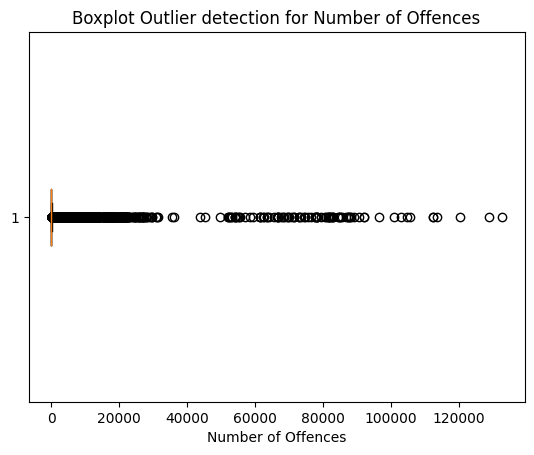

In [ ]:
plt.boxplot(merged_DF_pd['Number of Offences'], vert = False)
plt.title('Boxplot Outlier detection for Number of Offences')
plt.xlabel('Number of Offences')
plt.show()

In [ ]:
#Reset the index to tally with new number of rows
merged_DF_pd = merged_DF_pd.reset_index(drop=True)

In [ ]:
merged_DF_pd

,Financial Year,Financial Quarter,Force Name,Offence Group,Offence Subgroup,Offence Code,Number of Offences
0,2012/13,1,Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323.0
1,2012/13,1,Avon and Somerset,Violence against the person,Violence without injury,12,0.0
2,2012/13,1,Avon and Somerset,Miscellaneous crimes against society,Miscellaneous crimes against society,80,1.0
3,2012/13,1,Avon and Somerset,Sexual offences,Other sexual offences,71,0.0
4,2012/13,1,Avon and Somerset,Sexual offences,Other sexual offences,73,3.0
...,...,...,...,...,...,...,...
252091,2022/23,3,CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,96612.0
252092,2022/23,3,UK Finance,Fraud offences,Fraud: UK Finance,UK Finance,128818.0
252093,2022/23,4,Action Fraud,Fraud offences,Fraud: Action Fraud,AF,78312.0
252094,2022/23,4,CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,88141.0


In [ ]:
#Export Clean Data for Power BI visualization
merged_DF_pd.to_csv('CleanDataforVisualisation.csv', index=False)

In [ ]:
spark_Clean_DF = spark.createDataFrame(merged_DF_pd)

/content/spark-3.1.1-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:331: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [ ]:
from pyspark.sql.functions import avg, col, desc

In [ ]:
spark_Clean_DF.groupBy("Offence Group").sum("Number of Offences").show()

+--------------------+-----------------------+
|       Offence Group|sum(Number of Offences)|
+--------------------+-----------------------+
|Public order offe...|              3886443.0|
|             Robbery|               738343.0|
|      Fraud offences|              7999764.0|
|     Sexual offences|              1453870.0|
|Criminal damage a...|              5906879.0|
|Possession of wea...|               404123.0|
|       Drug offences|              1911637.0|
|      Theft offences|            1.9616514E7|
|Miscellaneous cri...|               934175.0|
|Violence against ...|            1.4982661E7|
+--------------------+-----------------------+



In [ ]:
#Explore using spark SQL

In [ ]:
spark_Clean_DF.groupBy("Offence Group")\
           .agg(func.sum("Number of Offences")\
                .alias("sum_number_of_offences"))\
           .orderBy("sum_number_of_offences", ascending = False).show(5)

+--------------------+----------------------+
|       Offence Group|sum_number_of_offences|
+--------------------+----------------------+
|      Theft offences|           1.9616514E7|
|Violence against ...|           1.4982661E7|
|      Fraud offences|             7999764.0|
|Criminal damage a...|             5906879.0|
|Public order offe...|             3886443.0|
+--------------------+----------------------+
only showing top 5 rows



In [ ]:
#Force name with highest number of offences recorded
spark_Clean_DF.groupBy("Force Name")\
           .agg(func.sum("Number of Offences")\
                .alias("sum_number_of_offences"))\
           .orderBy("sum_number_of_offences", ascending = False).show(1)

+-------------------+----------------------+
|         Force Name|sum_number_of_offences|
+-------------------+----------------------+
|Metropolitan Police|             8733471.0|
+-------------------+----------------------+
only showing top 1 row



In [ ]:
#Top Financial Year with highest number of offences recorded
spark_Clean_DF.groupBy("Financial Year")\
           .agg(func.sum("Number of Offences")\
                .alias("sum_number_of_offences"))\
           .orderBy("sum_number_of_offences", ascending = False).show(3)

+--------------+----------------------+
|Financial Year|sum_number_of_offences|
+--------------+----------------------+
|       2022/23|             6736588.0|
|       2021/22|             6343500.0|
|       2019/20|             6078988.0|
+--------------+----------------------+
only showing top 3 rows

